<a href="https://colab.research.google.com/github/dk-wei/ml-algo-implementation/blob/main/Support_Vector_Machines_(SVM)_with_Scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

这篇notebook将包括下列重点内容:
1. scaling for svm
2. threshold verification (recall, precision, f1 score trade off)
3. train test split
4. grid search (parameter tuning)
5. learning curve (val loss vs train loss, scoring选择)

虽然只是一个SVM的讲解，但是基本包括了你用sklearn做ML所需的大部分工具。

参考资料1: [SVM Hyperparameter Tuning using GridSearchCV | ML
](https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/)      
参考资料2: [Support Vector Machines with Scikit-learn
](https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python)

In [29]:
#Import scikit-learn dataset library
from sklearn import datasets
import numpy as np
import pandas as pd

#Load dataset
cancer = datasets.load_breast_cancer()

In [2]:
# print the names of the 13 features
print("Features: ", cancer.feature_names)

# print the label type of cancer('malignant' 'benign')
print("Labels: ", cancer.target_names)

Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Labels:  ['malignant' 'benign']


In [3]:
cancer.data.shape

(569, 30)

In [4]:
# print the cancer data features (top 5 records)
print(cancer.data[0:5])

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01 2.839e-01 2.414

In [5]:
# print the cancer labels (0:malignant, 1:benign)
print(cancer.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [25]:
from collections import Counter
Counter(cancer.target)

Counter({0: 212, 1: 357})

# SVM Kernels

The SVM algorithm is implemented in practice using a kernel. A kernel transforms an input data space into the required form. SVM uses a technique called the kernel trick. Here, the kernel takes a low-dimensional input space and transforms it into a higher dimensional space. In other words, you can say that it converts nonseparable problem to separable problems by adding more dimension to it. It is most useful in non-linear separation problem. Kernel trick helps you to build a more accurate classifier.

- `Linear Kernel` A linear kernel can be used as normal dot product any two given observations. The product between two vectors is the sum of the multiplication of each pair of input values.
$$K(x, x_i) = \sum(x * x_i)$$
- `Polynomial Kernel` A polynomial kernel is a more generalized form of the linear kernel. The polynomial kernel can distinguish curved or nonlinear input space.
$$K(x,x_i) = 1 + \sum(x * x_i)^d$$
Where d is the degree of the polynomial. d=1 is similar to the linear transformation. The degree needs to be manually specified in the learning algorithm.

- `Radial Basis Function Kernel` The Radial basis function kernel is a popular kernel function commonly used in support vector machine classification. RBF can map an input space in infinite dimensional space.
$$K(x,x_i) = exp(-\gamma * \sum((x – x_i^2))$$
Here $\gamma$ is a parameter, which ranges from 0 to 1. **A higher value of gamma will perfectly fit the training dataset, which causes over-fitting.** $\gamma$=0.1 is considered to be a good default value. The value of $\gamma$ needs to be manually specified in the learning algorithm.

In [67]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target, 
                                                    test_size=0.3, # 70% training and 30% test
                                                    random_state=109,
                                                    stratify = cancer.target
                                                    ) 

In [68]:
且容易过拟合

from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train = scaling.transform(X_train)
X_test = scaling.transform(X_test)

In [69]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear',
              probability=True) # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


In [70]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9707602339181286
Precision: 0.9636363636363636
Recall: 0.9906542056074766


In [71]:
THRESHOLD = 0.5
pred_test = np.where(clf.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)
pred_train = clf.predict(X_train)

print('Train Accuracy: ', metrics.accuracy_score(y_train, pred_train))
print('Test Accuraccy: ', metrics.accuracy_score(y_test, pred_test))
print('\nConfusion Matrix:')
print(metrics.confusion_matrix(y_test,pred_test))
print('\nClassification Report:')
print(metrics.classification_report(y_test,pred_test))

Train Accuracy:  0.9849246231155779
Test Accuraccy:  0.9707602339181286

Confusion Matrix:
[[ 61   3]
 [  2 105]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        64
           1       0.97      0.98      0.98       107

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



In [72]:
from sklearn import metrics
import plotly.express as px

def check_performance(predictions, true_labels, thresholds):
    
    performances = list()
    for thresh in thresholds:
        predicted_labels = np.where(predictions[:,1] > thresh, 1, 0)
        
        metric_dict = dict()
        metric_dict['threshold'] = thresh
        #metric_dict['accuracy'] = metrics.accuracy_score(true_labels, predicted_labels)
        metric_dict['precision'] = metrics.precision_score(true_labels, predicted_labels, zero_division = 0)
        metric_dict['recall'] = metrics.recall_score(true_labels, predicted_labels)
        metric_dict['f1_score'] = metrics.f1_score(true_labels, predicted_labels)
        
        performances.append(metric_dict)
    
    perf_metrics = pd.DataFrame(performances)
    df = perf_metrics.melt(id_vars='threshold', value_vars=[
                                                            #'accuracy', 
                                                            'precision',
                                                            'recall', 
                                                            'f1_score']
                          )
    df.columns = ['threshold','metric','score']
    fig = px.line(df, x="threshold", y="score", color="metric")
    
    return perf_metrics, fig


threshold_range = [x/1000 for x in range(0,1005,5)]
pred_test = clf.predict_proba(X_test)

perf_metrics, fig = check_performance(pred_test, y_test, threshold_range)
fig.update_layout(
                    autosize=False,
                    width=800,
                    height=400,
                    title = 'Threshold Verfication',
                )
fig.show()


In [73]:
# 我们可以根据图像确定threshold大致范围，f1 score是天花板，讲究一个recall和precision的权衡

THRESHOLD = 0.65
pred_test = np.where(clf.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)
pred_train = clf.predict(X_train)

print('Train Accuracy: ', metrics.accuracy_score(y_train, pred_train))
print('Test Accuraccy: ', metrics.accuracy_score(y_test, pred_test))
print('\nConfusion Matrix:')
print(metrics.confusion_matrix(y_test,pred_test))
print('\nClassification Report:')
print(metrics.classification_report(y_test,pred_test))

Train Accuracy:  0.9849246231155779
Test Accuraccy:  0.9707602339181286

Confusion Matrix:
[[ 62   2]
 [  3 104]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        64
           1       0.98      0.97      0.98       107

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



# Tuning Hyperparameters
- **`Kernel (rbf)`**: The main function of the kernel is to transform the given dataset input data into the required form. There are various types of functions such as linear, polynomial, and radial basis function (RBF). Polynomial and RBF are useful for non-linear hyperplane. Polynomial and RBF kernels compute the separation line in the higher dimension. In some of the applications, it is suggested to use a more complex kernel to separate the classes that are curved or nonlinear. This transformation can lead to more accurate classifiers.
- **`Regularization (C)`**: Regularization parameter in python's Scikit-learn C parameter used to maintain regularization. Here C is the penalty parameter, which represents misclassification or error term. The misclassification or error term tells the SVM optimization how much error is bearable. This is how you can control the trade-off between decision boundary and misclassification term. A smaller value of C creates a small-margin hyperplane and a larger value of C creates a larger-margin hyperplane.    **C越大，相当于惩罚松弛变量，希望松弛变量接近0，即对误分类的惩罚增大，趋向于对训练集全分对的情况，这样对训练集测试时准确率很高，但容易过拟合，泛化能力弱。C值小，对误分类的惩罚减小，允许容错，将他们当成噪声点，不容易过拟合，泛化能力较强。**
- **`Gamma (gamma)`**: A lower value of Gamma will loosely fit the training dataset, whereas a higher value of gamma will exactly fit the training dataset, which causes over-fitting. In other words, you can say a low value of gamma considers only nearby points in calculating the separation line, while the a value of gamma considers all the data points in the calculation of the separation line.  **gamma在0到1之间，gamma是选择RBF函数作为kernel后，该函数自带的一个参数。隐含地决定了数据映射到新的特征空间后的分布，gamma越大，支持向量越少，gamma值越小，支持向量越多，且容易过拟合。支持向量的个数影响训练与预测的速度。**

In [90]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'linear']} 
  
grid = GridSearchCV(clf, 
                    param_grid, 
                    refit = True, 
                    verbose = 1,
                    cv=StratifiedKFold(n_splits=5),
                    n_jobs = -1
                    )

# fitting the model for grid search
# fit出来的直接就是best model
best_model = grid.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 244 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    3.3s finished


In [91]:
print(grid.best_estimator_)
print(grid.best_params_)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [92]:
grid_predictions = best_model.predict(X_test)
  
# print classification report
print(metrics.classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        64
           1       0.96      0.98      0.97       107

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



# Learning Curve (Training loss vs Val loss)

In [128]:
X_train.shape, y_train.shape

((398, 30), (398,))

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Done 247 out of 250 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Done 240 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Done 244 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Done 240 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Done 244 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Done 247 out of 250 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Done 240 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Done 244 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Done 240 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Done 244 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Done 247 out of 250 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Done 240 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Done 244 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    2.1s finished


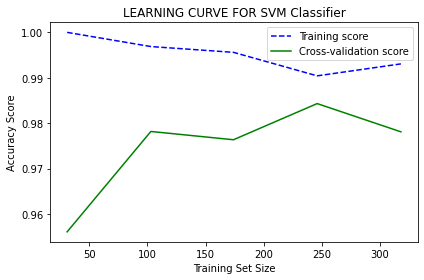

In [126]:
# 两模型学习曲线比较，官方代码：https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
# source code: https://www.geeksforgeeks.org/using-learning-curves-ml/
# Importing Required Libraries and Modules
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
  
# Obtain scores from learning curve function
# cv is the number of folds while performing Cross Validation
sizes, training_scores, testing_scores = learning_curve(best_model, 
                                                        X_train, 
                                                        y_train, 
                                                        cv=StratifiedKFold(n_splits=5), 
                                                        scoring='accuracy',   # chose an scoring method: https://scikit-learn.org/stable/modules/model_evaluation.html
                                                        #scoring = 'neg_mean_squared_error',
                                                        #scoring = 'f1'
                                                        #train_sizes=np.linspace(0.5, 1.0, 5),
                                                        verbose = 0,
                                                        #return_times = True
                                                        )
  
# Mean and Standard Deviation of training scores
mean_training = np.mean(training_scores, axis=1)
Standard_Deviation_training = np.std(training_scores, axis=1)
  
# Mean and Standard Deviation of testing scores
mean_testing = np.mean(testing_scores, axis=1)
Standard_Deviation_testing = np.std(testing_scores, axis=1)
  
# dotted blue line is for training scores and green line is for cross-validation score
plt.plot(sizes, mean_training, '--', color="b",  label="Training score")
plt.plot(sizes, mean_testing, color="g", label="Cross-validation score")
  
# Drawing plot
plt.title("LEARNING CURVE FOR SVM Classifier")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()